<a href="https://colab.research.google.com/github/jessepoljak/Project_2_Credit_Default/blob/marwen/Project2_Loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Import libs
!pip install ucimlrepo
!pip install imbalanced-learn


In [48]:
# Import depend
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
#from xgboost import XGBClassifier
from sklearn.metrics import classification_report
#from imblearn.ensemble import BalancedRandomForestClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [30]:
# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

In [31]:
X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets
df = pd.concat([X, y], axis=1)

df = df.rename(columns={'X1' : 'LIMIT_BAL',	'X2' : 'SEX',	'X3' : 'EDUCATION',	'X4' : 'MARRIAGE',	'X5' : 'AGE',	'X6' : 'PAY_1',	'X7' : 'PAY_2',	'X8' : 'PAY_3',	'X9' : 'PAY_4',	'X10' : 'PAY_5',	'X11' : 'PAY_6',	'X12' : 'BILL_AMT1',	'X13' : 'BILL_AMT2',	'X14' : 'BILL_AMT3',	'X15' : 'BILL_AMT4',	'X16' : 'BILL_AMT5',	'X17' : 'BILL_AMT6',	'X18' : 'PAY_AMT1',	'X19' : 'PAY_AMT2',	'X20' : 'PAY_AMT3',	'X21' : 'PAY_AMT4',	'X22' : 'PAY_AMT5',	'X23' : 'PAY_AMT6',	'Y' : 'default payment next month'})

df = df.rename(columns={'default payment next month' : 'default_payment_next_month'})

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [32]:
# Drop protected data
df.drop(columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis = 1, inplace =True)
df.head()

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [33]:
# Add const for VIF
df = sm.add_constant(df)

In [36]:
# Make X and Y dataframes
X = df.copy()
X.drop('default_payment_next_month', axis = 1, inplace = True)
y = df['default_payment_next_month']

In [37]:
# Use VIF to look for colin
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

     Variable        VIF
0       const   2.905049
1   LIMIT_BAL   1.455471
2       PAY_1   1.919362
3       PAY_2   3.170910
4       PAY_3   3.656754
5       PAY_4   4.286599
6       PAY_5   4.723479
7       PAY_6   3.254998
8   BILL_AMT1  14.016253
9   BILL_AMT2  25.861623
10  BILL_AMT3  21.769360
11  BILL_AMT4  20.345385
12  BILL_AMT5  24.990437
13  BILL_AMT6  15.024144
14   PAY_AMT1   1.707834
15   PAY_AMT2   2.236767
16   PAY_AMT3   1.756443
17   PAY_AMT4   1.648366
18   PAY_AMT5   1.687470
19   PAY_AMT6   1.169698


In [39]:
# Drop const and the bill_amts
X.drop(columns = ['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',], axis = 1, inplace =True)
X.head()

,const,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1.0,20000,2,2,-1,-1,-2,-2,3913,0,689,0,0,0,0
1,1.0,120000,-1,2,0,0,0,2,2682,0,1000,1000,1000,0,2000
2,1.0,90000,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000
3,1.0,50000,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000
4,1.0,50000,-1,0,-1,0,0,0,8617,2000,36681,10000,9000,689,679


In [40]:
# Check for imbalance
y.value_counts()

,count
default_payment_next_month,
0,23364
1,6636


In [51]:
# Train, test, split the data
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [52]:
# Scale the data
data_to_scale = ['LIMIT_BAL',
                'BILL_AMT1',
                'PAY_AMT1',
                'PAY_AMT2',
                'PAY_AMT3',
                'PAY_AMT4',
                'PAY_AMT5',
                'PAY_AMT6',]
# Initialize scaler
scaler = StandardScaler()
# Scale the demographic features
X_train[data_to_scale] = scaler.fit_transform(X_train[data_to_scale])

# Initialize scaler
scaler = StandardScaler()
# Scale the demographic features
X_test[data_to_scale] = scaler.fit_transform(X_test[data_to_scale])

In [54]:
# Balance the data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
y_train_res.value_counts()

,count
default_payment_next_month,
0,17490
1,17490


In [64]:
# Train Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [65]:
# Make predictions
y_pred = clf.predict(X_test)
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      5874
           1       0.51      0.51      0.51      1626

    accuracy                           0.79      7500
   macro avg       0.69      0.69      0.69      7500
weighted avg       0.79      0.79      0.79      7500



In [66]:
# Hyperparam Tuning using Grid Search
param_grid = {
    # 'max_depth': [5, 10, 15, 20, 30, 50, None],
    # 'n_estimators': [50, 100, 200, 300],
    # 'min_samples_split': [2, 5, 10, 20]
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

#grid_search = GridSearchCV(RandomForestClassifier(),
                           #param_grid=param_grid)
#grid_search.fit(X_train_res, y_train_res)
#print(grid_search.best_estimator_)

In [ ]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=param_grid, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
# Fit the model
random_search.fit(X_train_res, y_train_res)
# Best hyperparameters
print("Best Parameters:", random_search.best_params_)
# Best model
best_model = random_search.best_estimator_

In [62]:
# Train Random Forest
clf = RandomForestClassifier(n_estimators= 100, min_samples_split= 2, random_state= 42)
clf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [63]:
# Make predictions
y_pred = clf.predict(X_test)
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      5874
           1       0.51      0.51      0.51      1626

    accuracy                           0.79      7500
   macro avg       0.69      0.69      0.69      7500
weighted avg       0.79      0.79      0.79      7500



In [384]:
# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# # Create and train Balanced Random Forest model
# clf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X_train, y_train)
# # Make predictions
# y_pred = clf.predict(X_test)
# # Evaluate the model
# print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


              precision    recall  f1-score   support

           0       0.88      0.78      0.82      7040
           1       0.44      0.62      0.51      1960

    accuracy                           0.74      9000
   macro avg       0.66      0.70      0.67      9000
weighted avg       0.78      0.74      0.76      9000



In [279]:
# # Initialize the logistical regression model
# logistic_regression_model = LogisticRegression(random_state= 1)

In [280]:
# # Fit the logistical regression model, with unscaled data
# logistic_regression_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [281]:
# # Score the logistical regression model, with unscaled data
# print(f"Training Data Score: {logistic_regression_model.score(X_train, y_train)}")
# print(f"Testing Data Score: {logistic_regression_model.score(X_test, y_test)}")

Training Data Score: 0.778
Testing Data Score: 0.7808


In [282]:
# # Get the accuracy score for the logistical regression model, with unscaled data
# testing_predictions = logistic_regression_model.predict(X_test)
# accuracy_score(y_test, testing_predictions)

0.7808

In [363]:
# # Scale the data using standard scaler
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

array([[-0.36144491,  0.8044532 ,  0.1875554 , ..., -0.31289103,
        -0.31131146, -0.29020564],
       [-0.20681   ,  0.8044532 , -1.08085351, ..., -0.31289103,
        -0.31131146, -0.29020564],
       [ 2.57661842, -1.2430804 , -1.08085351, ..., -0.31289103,
        -0.31131146, -0.29020564],
       ...,
       [-0.51607982,  0.8044532 ,  0.1875554 , ..., -0.31289103,
        -0.31131146, -0.29020564],
       [ 2.57661842,  0.8044532 ,  0.1875554 , ...,  3.47994382,
         3.91823259,  0.48746943],
       [-1.13461947,  0.8044532 ,  0.1875554 , ..., -0.24686023,
         0.6729138 , -0.29020564]])

In [284]:
# # Fit the logistical regression model, with the standard scaled data
# logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [285]:
# # Score the logistical regression model, with the standard scaled data
# print(f"Training Data Score: {logistic_regression_model.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {logistic_regression_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8083555555555556
Testing Data Score: 0.8145333333333333


In [286]:
# # Get the accuracy score for the logistical regression model, with the standard scaled data
# testing_predictions = logistic_regression_model.predict(X_test_scaled)
# accuracy_score(y_test, testing_predictions)

0.8145333333333333

In [287]:
# # Scale the data using Min Max scaler
# scaler = MinMaxScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [288]:
# # Fit the logistical regression model, with the min max scaled data
# logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [289]:
# # Score the logistical regression model, with the min max scaled data
# print(f"Training Data Score: {logistic_regression_model.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {logistic_regression_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8081777777777778
Testing Data Score: 0.8134666666666667


In [290]:
# # Get the accuracy score for the logistical regression model, with the min max scaled data
# testing_predictions = logistic_regression_model.predict(X_test_scaled)
# accuracy_score(y_test, testing_predictions)

0.8134666666666667

In [291]:
# It appears that scaling the data improves the accuracy score by about 3% but the way in which scale the data is marginal.
# Standard scaling tending to be slightly better for predictions.

k: 1, Train/Test Score: 0.999/0.697
k: 3, Train/Test Score: 0.843/0.737
k: 5, Train/Test Score: 0.818/0.755
k: 7, Train/Test Score: 0.805/0.761
k: 9, Train/Test Score: 0.799/0.768
k: 11, Train/Test Score: 0.796/0.773
k: 13, Train/Test Score: 0.793/0.773
k: 15, Train/Test Score: 0.791/0.776
k: 17, Train/Test Score: 0.790/0.777
k: 19, Train/Test Score: 0.789/0.779


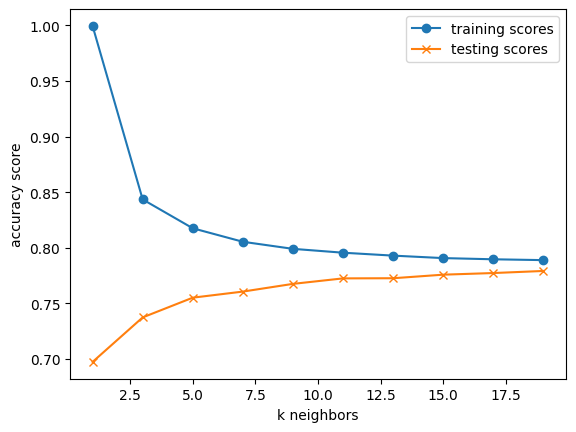

In [292]:
# # Because we have to account for overfitting and accuracy, we will plot the K values with the unscaled data.
# train_scores = []
# test_scores = []
# for k in range(1, 20, 2):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     train_score = knn.score(X_train, y_train)
#     test_score = knn.score(X_test, y_test)
#     train_scores.append(train_score)
#     test_scores.append(test_score)
#     print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

# # Plot the results
# plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
# plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
# plt.xlabel("k neighbors")
# plt.ylabel("accuracy score")
# plt.legend()
# plt.show()

In [293]:
# # Scale the data using standard scaler
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

k: 1, Train/Test Score: 0.999/0.733
k: 3, Train/Test Score: 0.865/0.781
k: 5, Train/Test Score: 0.840/0.799
k: 7, Train/Test Score: 0.831/0.805
k: 9, Train/Test Score: 0.827/0.813
k: 11, Train/Test Score: 0.825/0.817
k: 13, Train/Test Score: 0.823/0.815
k: 15, Train/Test Score: 0.820/0.817
k: 17, Train/Test Score: 0.820/0.819
k: 19, Train/Test Score: 0.818/0.817


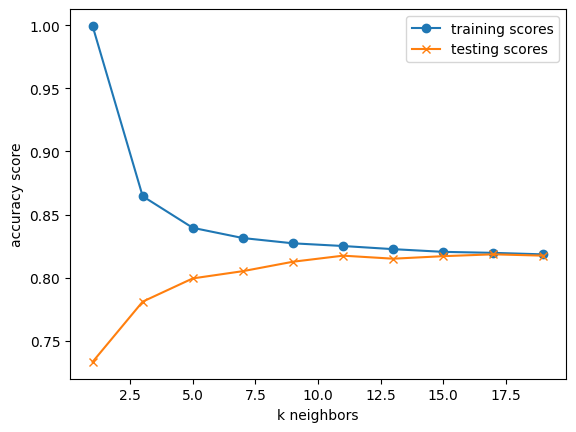

In [294]:
# # Now we will look for K with standard scaled data.
# train_scores = []
# test_scores = []
# for k in range(1, 20, 2):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train_scaled, y_train)
#     train_score = knn.score(X_train_scaled, y_train)
#     test_score = knn.score(X_test_scaled, y_test)
#     train_scores.append(train_score)
#     test_scores.append(test_score)
#     print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

# # Plot the results
# plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
# plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
# plt.xlabel("k neighbors")
# plt.ylabel("accuracy score")
# plt.legend()
# plt.show()

In [295]:
# # As with the logistical regression, scaling the data marginally increased the predictive accuracy of the model.
# # In addition we see that K=9 - K=13 is where the predictive accuracy starts to level out.
# knn = KNeighborsClassifier(n_neighbors=13)
# knn.fit(X_train_scaled, y_train)
# print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.815


In [296]:
# # Now we will use Support Vector Classification
# # Initialize the model, using polynomial kernel because of the large number of features.
# svm_model = SVC(kernel='poly', random_state = 1)

In [297]:
# # Fit the model to the scaled training data
# svm_model.fit(X_train_scaled, y_train)

SVC(kernel='poly', random_state=1)

In [298]:
# # Get the accuracy of the SVM model.
# print('Train Accuracy: %.3f' % svm_model.score(X_train_scaled, y_train))
# print('Test Accuracy: %.3f' % svm_model.score(X_test_scaled, y_test))

Train Accuracy: 0.812
Test Accuracy: 0.811


In [299]:
# # Get the accuracy score for the SVM model, with the standard scaled data
# testing_predictions = svm_model.predict(X_test_scaled)
# accuracy_score(y_test, testing_predictions)

0.8109333333333333

In [382]:
# # Lastly we will use a Random Forests Classifier model.
# # Initalize and fit the model.
# clf = RandomForestClassifier(random_state=1, n_estimators=100, max_depth= 6).fit(X_train_scaled, y_train)
# y_pred_test = clf.predict(X_test_scaled)
# print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5838
           1       0.00      0.00      0.00      1662

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.68      7500



In [322]:
# # Get the accuracy of the Random Forests Classifier model.
# print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
# print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.8244444444444444
Testing Score: 0.8218666666666666


In [302]:
# # Get the accuracy score for the Random Forests Classifier model, with the standard scaled data
# testing_predictions = clf.predict(X_test_scaled)
# accuracy_score(y_test, testing_predictions)

0.8184

In [325]:
# # Train the ExtraTreesClassifier model
# clf = ExtraTreesClassifier(random_state=1).fit(X_train_scaled, y_train)

# # Evaluate the model
# print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
# print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9993777777777778
Testing Score: 0.8209333333333333


In [333]:
# # Train the Gradient Boosting classifier
# clf = GradientBoostingClassifier(random_state=1).fit(X_train_scaled, y_train)

# # Evaluate the model
# print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
# print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.8254222222222222
Testing Score: 0.8244


In [329]:
# # Train the AdaBoostClassifier
# clf = AdaBoostClassifier(random_state=1).fit(X_train_scaled, y_train)

# # Evaluate the model
# print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
# print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Score: 0.8176444444444444
Testing Score: 0.8206666666666667


In [349]:
# # Feature Engineering
# fe_X = X.copy()
# for n in range(1, 7):
#   fe_X[f"Outstanding_AMT{n}"] = X[f"BILL_AMT{n}"] - X[f"PAY_AMT{n}"]

# fe_X['Outstanding_AMT_Total'] = X['Outstanding_AMT1'] + X['Outstanding_AMT2'] + X['Outstanding_AMT3'] + X['Outstanding_AMT4'] + X['Outstanding_AMT5'] + X['Outstanding_AMT6']

# fe_X['Credit_Utilization'] = X['Outstanding_AMT_Total'] / X['LIMIT_BAL'] * 100
# fe_X['Avg_Credit_Utilization'] = X['Credit_Utilization']/6

# for n in range(1, 7):
#   fe_X[f"Credit_Utilization{n}"] = X[f"Outstanding_AMT{n}"] / X['LIMIT_BAL'] * 100

# fe_X.head()

# #X = X[['Outstanding_AMT_Total', 'Credit_Utilization']]
# #X.head()

KeyError: 'Outstanding_AMT1'

In [344]:
# # Train, test, split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y)

# # Scale the data using standard scaler
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [345]:
# # Train the Gradient Boosting classifier
# clf = GradientBoostingClassifier(random_state=1).fit(X_train_scaled, y_train)

# # Evaluate the model
# print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
# print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.7833333333333333
Testing Score: 0.7706666666666667
